<a href="https://colab.research.google.com/github/21287106/21287106_21158805/blob/main/assignment2_sprint2_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall -y numpy
!pip uninstall -y setuptools
!pip install setuptools
!pip install numpy

Found existing installation: numpy 1.26.0
Uninstalling numpy-1.26.0:
  Successfully uninstalled numpy-1.26.0
Found existing installation: setuptools 68.2.2
Uninstalling setuptools-68.2.2:
  Successfully uninstalled setuptools-68.2.2
  Using cached setuptools-68.2.2-py3-none-any.whl (807 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires numpy>=1.20.0, which is not installed.
cufflinks 0.17.3 requires numpy>=1.9.2, which is not installed.
cvxpy 1.3.2 requires numpy>=1.15, which is not installed.
datascience 0.17.6 requires numpy, which is not installed.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
mlxtend 0.22.0 requires numpy>=1.16.2, which is not installed.
nibabel 4.0.2 requires numpy>=1.17, which is not installed.
numba 0.56.4 requires numpy<1.24,>=1.18, which is not installed.
pandas-gbq 0.17.9 requires numpy>=1.16.6, w

  Using cached numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.0 which is incompatible.
tensorflow 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.26.0 which is incompatible.


In [ ]:
!pip install pyLDAvis

In [ ]:
# Loading primary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# For text processing
import re
from textblob import TextBlob
import gensim
import logging
import tempfile
from gensim import corpora, models, similarities
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.gensim_models


#Load the dataset in colab



In [ ]:
df_twitter = pd.read_excel("EV_community_discussion_data.xlsx", sheet_name='Twitter')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# display the column names of the datasets
df_twitter.columns



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['twid', 'date', 'time', 'user_id', 'username', 'tweet', 'replies_count',
       'retweets_count', 'likes_count', 'hashtags', 'trans_dest'],
      dtype='object')

In [ ]:
print("dataset length:", len(df_twitter))

dataset length: 1896


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   twid            1896 non-null   object        
 1   date            1896 non-null   datetime64[ns]
 2   time            1896 non-null   object        
 3   user_id         1896 non-null   int64         
 4   username        1896 non-null   object        
 5   tweet           1895 non-null   object        
 6   replies_count   1896 non-null   int64         
 7   retweets_count  1896 non-null   int64         
 8   likes_count     1896 non-null   int64         
 9   hashtags        1896 non-null   object        
 10  trans_dest      0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 163.1+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#check for missing values in the dataset

In [ ]:
df_twitter.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


twid                 0
date                 0
time                 0
user_id              0
username             0
tweet                1
replies_count        0
retweets_count       0
likes_count          0
hashtags             0
trans_dest        1896
dtype: int64

#replace missing value of trans_dest with 0

In [ ]:
df_twitter.fillna(0, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


checking if it's replaced

In [ ]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


twid              0
date              0
time              0
user_id           0
username          0
tweet             0
replies_count     0
retweets_count    0
likes_count       0
hashtags          0
trans_dest        0
dtype: int64

**Preprocessing**

In [ ]:
# Transform sentences into lowercase
df_twitter['tweet'] = df['tweet'].str.lower()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_twitter.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,twid,date,time,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,trans_dest
1891,tw612,2017-02-15,05:33:22,253615321,alexwitzleben,#bmw criticizes australia over lack of #electr...,0,0,0,"['#bmw', '#electriccar', '#electriccar', '#ele...",0.0
1892,tw1267,2017-02-08,22:01:04,352630076,climateworksaus,could @volkswagen boost #electricvehicle uptak...,0,0,0,"['#electricvehicle', '#australia', '#evs']",0.0
1893,tw1268,2017-01-19,16:03:22,298414712,renee_gardner_,does #australia offer incentives for #electric...,0,0,0,"['#australia', '#electricvehicle', '#ev']",0.0
1894,tw613,2017-01-16,23:01:50,721719600354865024,themotoringweb,#electriccars the plug has all but been pulled...,0,0,0,['#electriccars'],0.0
1895,tw614,2017-01-13,07:00:02,482133423,dtdchange,tesla finishes melbourne to brisbane superchar...,1,14,9,"['#electriccars', '#infrastructure']",0.0


#Regular-expression

In [ ]:
def remove_twitter_ids(tweet):
  mention_removed_tweet = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(tweet)) # remove any sequence of characters followed by '@' sign
  spaces_removed = re.sub(r"\s\s+", " ", str(mention_removed_tweet)) # remove multiple spaces
  return spaces_removed

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_twitter['tweet'] = df_twitter['tweet'].apply(remove_twitter_ids)
df_twitter.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,twid,date,time,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,trans_dest
0,tw1,2020-08-05,11:42:01,9468852,cbartens,brilliant the good car company affordable elec...,0,0,0,"['#electriccars', '#nissan']",0.0
1,tw1356,2020-08-05,10:59:42,3029729586,david_day_,time for australia to wake up or risk becoming...,0,3,2,[],0.0
2,tw1357,2020-08-05,07:47:53,778919486,myoldfriend2008,i want to see a stock appearing race car not a...,0,0,0,[],0.0
3,tw689,2020-08-04,12:57:24,2434883094,kateccranney,i never thought id be nerding out on car sale ...,0,1,2,['#electricvehicle'],0.0
4,tw1358,2020-08-04,22:26:15,1375696142,neillade,australia when peugeot is missing out mercedes...,0,0,0,[],0.0


#Remove the digits

In [ ]:
def remove_digits(sent):
  return " ".join(w for w in sent.split() if not w.isdigit())

df_twitter['tweet'] = df_twitter['tweet'].apply(remove_digits)
df_twitter.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,twid,date,time,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,trans_dest
0,tw1,2020-08-05,11:42:01,9468852,cbartens,brilliant the good car company affordable elec...,0,0,0,"['#electriccars', '#nissan']",0.0
1,tw1356,2020-08-05,10:59:42,3029729586,david_day_,time for australia to wake up or risk becoming...,0,3,2,[],0.0
2,tw1357,2020-08-05,07:47:53,778919486,myoldfriend2008,i want to see a stock appearing race car not a...,0,0,0,[],0.0
3,tw689,2020-08-04,12:57:24,2434883094,kateccranney,i never thought id be nerding out on car sale ...,0,1,2,['#electricvehicle'],0.0
4,tw1358,2020-08-04,22:26:15,1375696142,neillade,australia when peugeot is missing out mercedes...,0,0,0,[],0.0


#Duplicate removal

In [ ]:
# Check duplicate tweets count
duplicate_count = len(df_twitter['tweet'])-len(df_twitter['tweet'].drop_duplicates())
print('duplicate count:', duplicate_count)
print('total records before remove duplicates:', df_twitter.shape[0])

duplicate count: 34
total records before remove duplicates: 1896


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Check duplicate tweets count
duplicate_count = len(df_twitter['tweet'])-len(df_twitter['tweet'].drop_duplicates())
print('duplicate count:', duplicate_count)
print('total records before remove duplicates:', df_twitter.shape[0])

duplicate count: 34
total records before remove duplicates: 1896


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#remove all punctuation

In [ ]:
df_twitter['tweet'] = df_twitter['tweet'].str.replace(r'[^\w\s]','')
df_twitter.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,twid,date,time,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,trans_dest
1891,tw612,2017-02-15,05:33:22,253615321,alexwitzleben,bmw criticizes australia over lack of electric...,0,0,0,"['#bmw', '#electriccar', '#electriccar', '#ele...",0.0
1892,tw1267,2017-02-08,22:01:04,352630076,climateworksaus,could boost electricvehicle uptake in australi...,0,0,0,"['#electricvehicle', '#australia', '#evs']",0.0
1893,tw1268,2017-01-19,16:03:22,298414712,renee_gardner_,does australia offer incentives for electricve...,0,0,0,"['#australia', '#electricvehicle', '#ev']",0.0
1894,tw613,2017-01-16,23:01:50,721719600354865024,themotoringweb,electriccars the plug has all but been pulled ...,0,0,0,['#electriccars'],0.0
1895,tw614,2017-01-13,07:00:02,482133423,dtdchange,tesla finishes melbourne to brisbane superchar...,1,14,9,"['#electriccars', '#infrastructure']",0.0



#Stop words and domain related word removal

In [ ]:
#Remove stop words
# Load NLTK library
import nltk

# Download the stopwords to the nltk library
nltk.download('stopwords')

# Load the stopwords
from nltk.corpus import stopwords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# get the list of all stopwords from the library
stop = stopwords.words('english')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(stop)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


removing not from the stopword list as this will have a negative impact on sentiment analysis

In [ ]:
stop.remove('not')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(stop)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Remove the words in 'stop' list
def remove_stop_words(tweet):
  tokens = tweet.split()
  stop_removed_tokens = [t for t in tokens if t not in stop]
  convert_to_string = " ".join(stop_removed_tokens)
  return convert_to_string

df_twitter['tweet'] = df_twitter['tweet'].apply(remove_stop_words)
df_twitter.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,twid,date,time,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,trans_dest
1891,tw612,2017-02-15,05:33:22,253615321,alexwitzleben,bmw criticizes australia lack electriccar poli...,0,0,0,"['#bmw', '#electriccar', '#electriccar', '#ele...",0.0
1892,tw1267,2017-02-08,22:01:04,352630076,climateworksaus,could boost electricvehicle uptake australia e...,0,0,0,"['#electricvehicle', '#australia', '#evs']",0.0
1893,tw1268,2017-01-19,16:03:22,298414712,renee_gardner_,australia offer incentives electricvehicle pur...,0,0,0,"['#australia', '#electricvehicle', '#ev']",0.0
1894,tw613,2017-01-16,23:01:50,721719600354865024,themotoringweb,electriccars plug pulled electric cars australia,0,0,0,['#electriccars'],0.0
1895,tw614,2017-01-13,07:00:02,482133423,dtdchange,tesla finishes melbourne brisbane supercharger...,1,14,9,"['#electriccars', '#infrastructure']",0.0



# Standardization of tweets

# stemming

In [36]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming_function(sent):
  word_list = sent.split()
  stemmed_word_list = [stemmer.stem(word) for word in word_list]
  stemmed_sentence = " ".join(stemmed_word_list)
  return stemmed_sentence

df_twitter['tweet_stem'] = df_twitter['tweet'].apply(stemming_function)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
df_twitter.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,twid,date,time,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,trans_dest,tweet_stem
0,tw1,2020-08-05,11:42:01,9468852,cbartens,brilliant good car company affordable electric...,0,0,0,"['#electriccars', '#nissan']",0.0,brilliant good car compani afford electriccar ...
1,tw1356,2020-08-05,10:59:42,3029729586,david_day_,time australia wake risk becoming cuba south p...,0,3,2,[],0.0,time australia wake risk becom cuba south paci...
2,tw1357,2020-08-05,07:47:53,778919486,myoldfriend2008,want see stock appearing race car not hybrid f...,0,0,0,[],0.0,want see stock appear race car not hybrid f2 s...
3,tw689,2020-08-04,12:57:24,2434883094,kateccranney,never thought id nerding car sale sites part w...,0,1,2,['#electricvehicle'],0.0,never thought id nerd car sale site part work ...
4,tw1358,2020-08-04,22:26:15,1375696142,neillade,australia peugeot missing mercedes eq got car ...,0,0,0,[],0.0,australia peugeot miss merced eq got car year ...


with stemming the words did not show the expected results therefore we shall try lemmetaizing it.

## Lemmatization

In [39]:
# Download wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [40]:
from nltk.stem import WordNetLemmatizer

lemmtizer = WordNetLemmatizer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
def lemmatize_function(sent):
  word_list = sent.split()
  lemma_word_list = [lemmtizer.lemmatize(word) for word in word_list]
  lemma_sentence = " ".join(lemma_word_list)
  return lemma_sentence

df_twitter['tweet_lemmatized'] = df_twitter['tweet'].apply(lemmatize_function)
df_twitter.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,twid,date,time,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,trans_dest,tweet_stem,tweet_lemmatized
0,tw1,2020-08-05,11:42:01,9468852,cbartens,brilliant good car company affordable electric...,0,0,0,"['#electriccars', '#nissan']",0.0,brilliant good car compani afford electriccar ...,brilliant good car company affordable electric...
1,tw1356,2020-08-05,10:59:42,3029729586,david_day_,time australia wake risk becoming cuba south p...,0,3,2,[],0.0,time australia wake risk becom cuba south paci...,time australia wake risk becoming cuba south p...
2,tw1357,2020-08-05,07:47:53,778919486,myoldfriend2008,want see stock appearing race car not hybrid f...,0,0,0,[],0.0,want see stock appear race car not hybrid f2 s...,want see stock appearing race car not hybrid f...
3,tw689,2020-08-04,12:57:24,2434883094,kateccranney,never thought id nerding car sale sites part w...,0,1,2,['#electricvehicle'],0.0,never thought id nerd car sale site part work ...,never thought id nerding car sale site part wo...
4,tw1358,2020-08-04,22:26:15,1375696142,neillade,australia peugeot missing mercedes eq got car ...,0,0,0,[],0.0,australia peugeot miss merced eq got car year ...,australia peugeot missing mercedes eq got car ...


after lemmetisation the words are much clear and accurate

In [44]:
df_twitter[['tweet', 'tweet_stem','tweet_lemmatized']].head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet,tweet_stem,tweet_lemmatized
0,brilliant good car company affordable electric...,brilliant good car compani afford electriccar ...,brilliant good car company affordable electric...
1,time australia wake risk becoming cuba south p...,time australia wake risk becom cuba south paci...,time australia wake risk becoming cuba south p...
2,want see stock appearing race car not hybrid f...,want see stock appear race car not hybrid f2 s...,want see stock appearing race car not hybrid f...
3,never thought id nerding car sale sites part w...,never thought id nerd car sale site part work ...,never thought id nerding car sale site part wo...
4,australia peugeot missing mercedes eq got car ...,australia peugeot miss merced eq got car year ...,australia peugeot missing mercedes eq got car ...
5,wow imagine able lease electric car australia ...,wow imagin abl leas electr car australia aud16...,wow imagine able lease electric car australia ...
6,never use system apple cars arecoming nation c...,never use system appl car arecom nation creat ...,never use system apple car arecoming nation cr...
7,rangerovers evoque comes new hybrid twist expe...,rangerov evoqu come new hybrid twist expect ar...,rangerovers evoque come new hybrid twist expec...
8,impact australias lack electric vehicle policy...,impact australia lack electr vehicl polici nom...,impact australia lack electric vehicle policy ...
9,electric cars australia sell pay significantly...,electr car australia sell pay significantli od...,electric car australia sell pay significantly ...


#word frequency

In [47]:
word_frequency = pd.Series(' '.join(df_twitter['tweet_lemmatized']).split()).value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
# Look at the top 10 words
word_frequency[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


australia           2104
car                 1279
electric            1198
ev                   672
electricvehicle      586
electriccars         586
tesla                296
battery              276
vehicle              260
electricvehicles     200
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in 

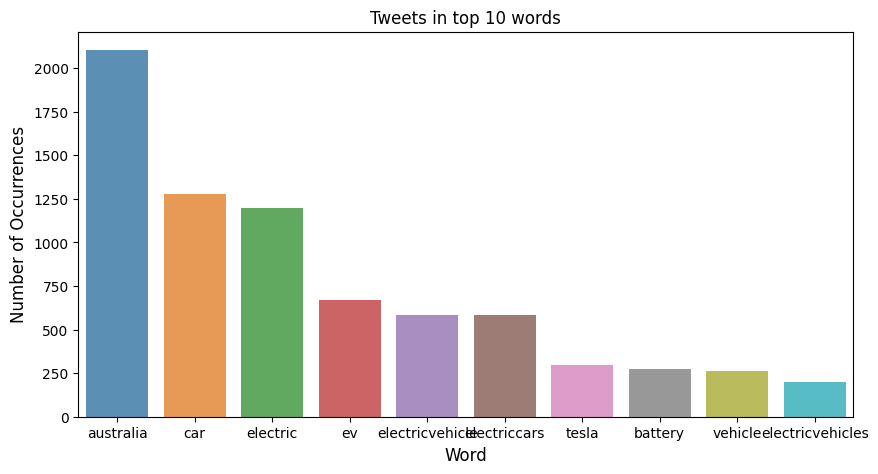

In [49]:
# Visualize the top word counts

word_count  = word_frequency
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(x=word_count.index, y=word_count.values, alpha=0.8)
plt.title('Tweets in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

In [50]:
from PIL import Image
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


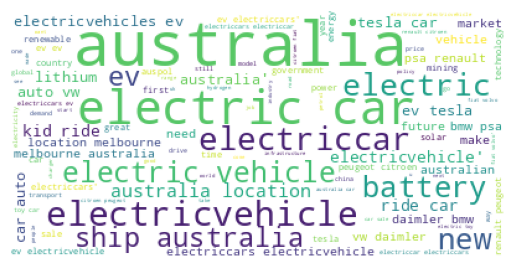

In [52]:
corpus = list(df_twitter['tweet_lemmatized'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From the word cloud we could identify that terms australia, car, electric, ev has been mentioned frequently. this do not provide much insights Therefore,we shal  remove high frequent yet non-insightful words alongside the twitter specific words.


# Remove common words

In [59]:
# Creating a list of custom stopwords
new_words_to_remove = ["australia",  "car", "electricvehicle", "vehicle", "ev", "electric", "electriccars"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
# Remove common words
# We will use lambda function here.
df_twitter['tweet_lemmatized'] = df_twitter['tweet_lemmatized'].apply(lambda x: " ".join(x for x in x.split() if x not in new_words_to_remove))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
# Look at the top 10 words
word_frequency[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


australia           2104
car                 1279
electric            1198
ev                   672
electricvehicle      586
electriccars         586
tesla                296
battery              276
vehicle              260
electricvehicles     200
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


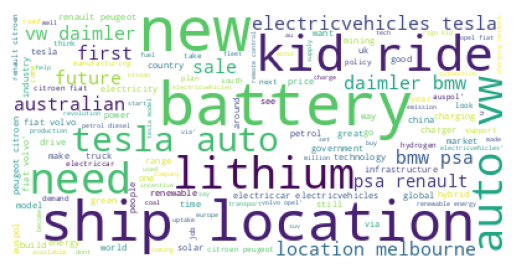

In [62]:
corpus = list(df_twitter['tweet_lemmatized'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


## Bigrams and Trigrams

# Bigrams

In [63]:
# This function will generate most frequently occuring Bi-grams
def get_ngrams(corpus, ngram_range=(2, 2)):

    # Create CountVectorizer object from sklearn library with bigrams
    vec1 = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(corpus)

    # Create BoW feature representation using word frequency
    bag_of_words = vec1.transform(corpus)

    # compute sum of words
    sum_words = bag_of_words.sum(axis=0)

    # create (word, frequency) tuples for bigrams
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
bigrams_twitter = get_ngrams(df_twitter['tweet'].tolist(), ngram_range=(2, 2))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
bigrams_twitter

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('electric cars', 320),
 ('electric car', 285),
 ('ships australia', 157),
 ('australia location', 155),
 ('kids ride', 113),
 ('ride car', 100),
 ('electric vehicles', 97),
 ('cars autos', 94),
 ('electriccars electricvehicles', 87),
 ('autos vw', 87),
 ('tesla cars', 86),
 ('electric vehicle', 84),
 ('melbourne australia', 74),
 ('location melbourne', 74),
 ('vw daimler', 72),
 ('evs tesla', 71),
 ('daimler bmw', 71),
 ('fiat volvo', 70),
 ('cars australia', 69),
 ('electricvehicles evs', 69),
 ('bmw psa', 68),
 ('psa renault', 66),
 ('evs electriccars', 60),
 ('australia electriccars', 60),
 ('australia electricvehicle', 52),
 ('ev electricvehicle', 51),
 ('renault peugeot', 49),
 ('peugeot citroen', 48),
 ('car electric', 42),
 ('electriccars electriccar', 41),
 ('australia electric', 39),
 ('electriccar electriccars', 39),
 ('electriccars australia', 36),
 ('electriccars ev', 36),
 ('ev evs', 36),
 ('citroen fiat', 36),
 ('citroen peugeot', 34),
 ('renault citroen', 33),
 ('elect

Convert bigrams to a dataframe with column names bi-gram and frequency.

In [66]:
bigrams_twitter_df = pd.DataFrame(bigrams_twitter)
bigrams_twitter_df.columns=["Bi-gram", "Freq"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in 

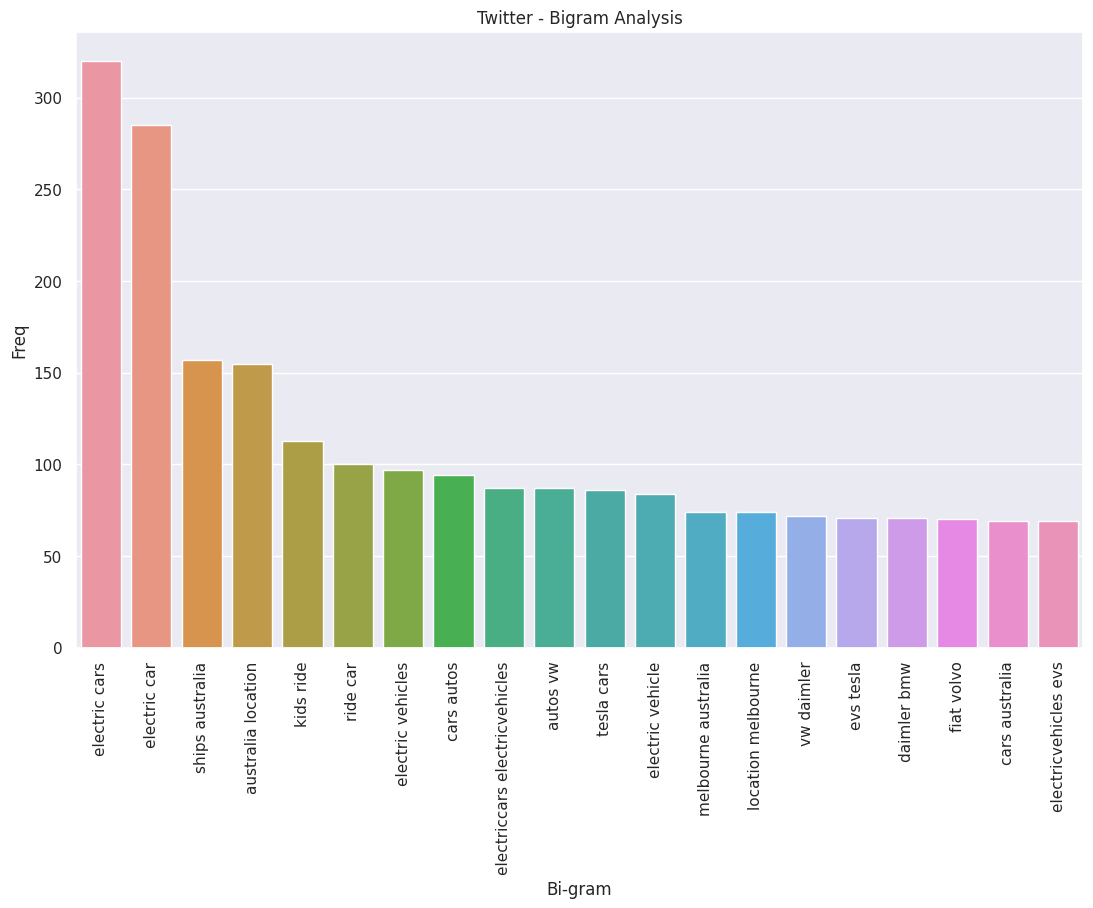

In [67]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=bigrams_twitter_df[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels
plt.title('Twitter - Bigram Analysis')
plt.show()

**Trigrams**

In [68]:
trigrams_twitter = get_ngrams(df_twitter['tweet'].tolist(), ngram_range=(3, 3))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Convert trigrams to a dataframe with column names tri-gram and frequency.

In [69]:
trigrams_twitter_df = pd.DataFrame(trigrams_twitter)
trigrams_twitter_df.columns=["Tri-gram", "Freq"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in 

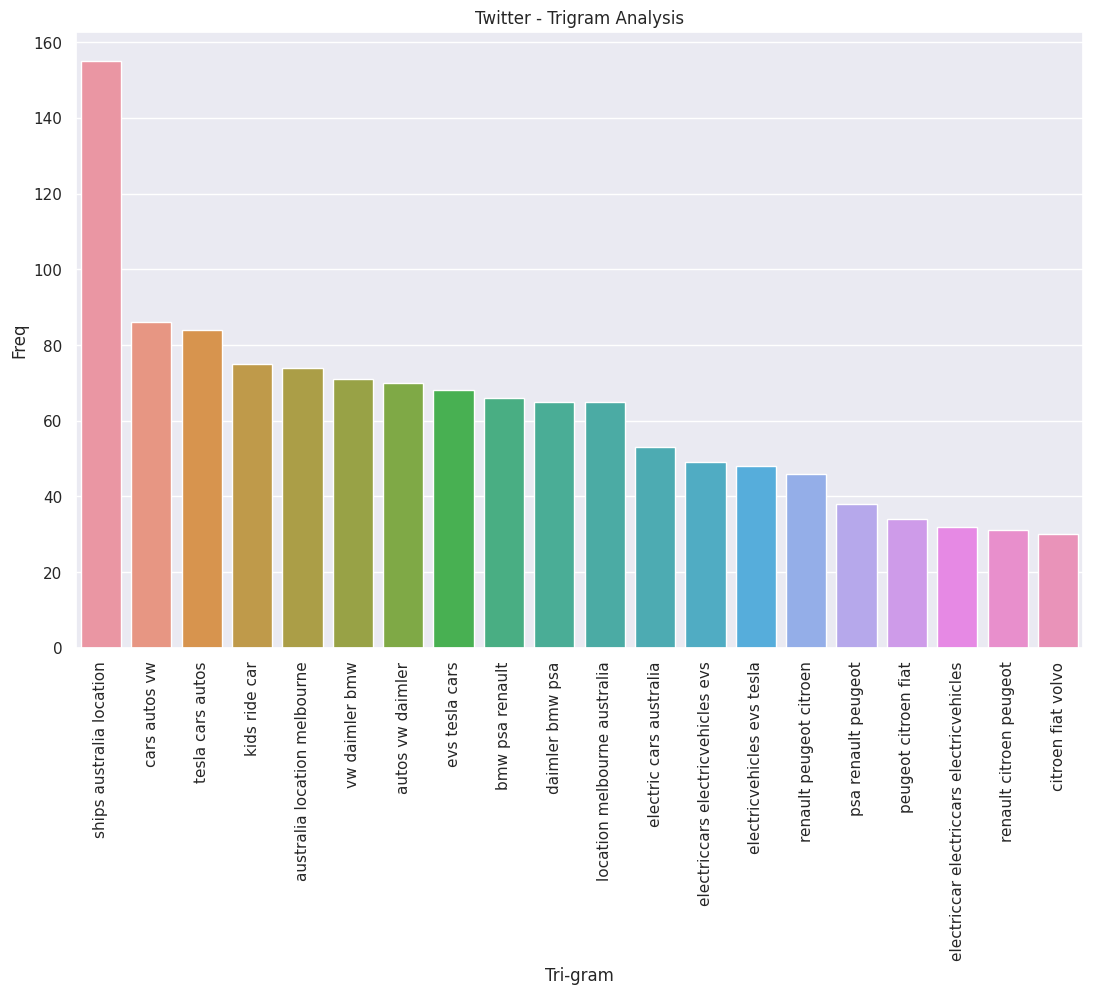

In [70]:
# Barplot of most freq Tri-grams
top_trigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Tri-gram", y="Freq", data=trigrams_twitter_df[:top_trigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)
plt.title('Twitter - Trigram Analysis')
plt.show()

# Sentiment Analysis


In [71]:
# Extract sentiments from the tweets
df_twitter['sentiment'] = df_twitter['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
# Display first 50 tweets with respective sentiment value
df_twitter[['twid', 'sentiment']].head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,twid,sentiment
0,tw1,0.800000
1,tw1356,0.293182
2,tw1357,0.244444
3,tw689,0.500000
4,tw1358,0.200000
5,tw1359,0.300000
6,tw1360,0.117500
7,tw690,0.112121
8,tw1361,0.191667
9,tw1362,0.069444


In [81]:
df_twitter.groupby(['twid'])['sentiment'].mean()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


twid
tw1       0.800
tw10      0.000
tw100     0.425
tw1000    0.100
tw1001    0.000
          ...  
tw995     0.500
tw996     0.800
tw997     0.000
tw998     0.000
tw999     0.400
Name: sentiment, Length: 1896, dtype: float64

In [83]:
df_senti_twitter = df_twitter.groupby(['twid'])['sentiment'].mean().reset_index(name='mean_sentiment').set_index('twid')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


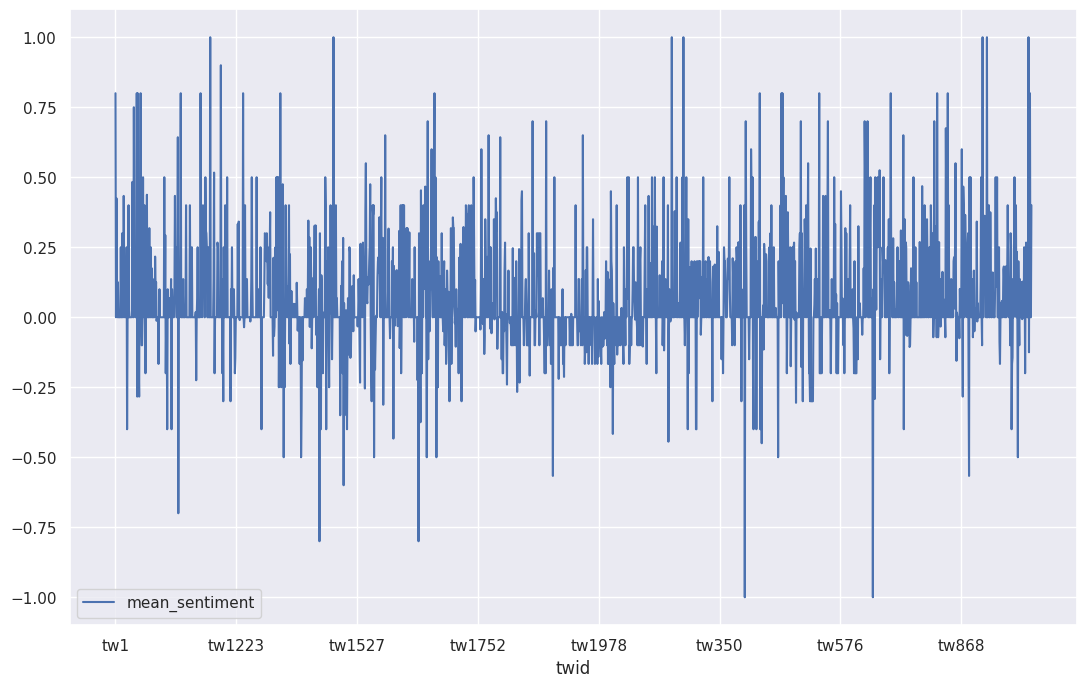

In [84]:
# Plot twitter sentiment with twitter id
ax = df_senti_twitter.plot()
plt.savefig('temporal_sentiment_v2.png', dpi=1200)


# Topic Modeling

We will conduct a topic modeling using a algorithm named - LDA (Latent Dirichlet Allocation)

In [85]:
# Setting up the environment for LDA algorithm.

TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


Folder "/tmp" will be used to save temporary dictionary and corpus.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


creating the text corpus.

In [86]:
# Convert the tweets as the text corpus.
corpus = list(df_twitter['tweet'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
corpus[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['brilliant good car company affordable electriccars australia imported japan nissan',
 'time australia wake risk becoming cuba south pacific tourists come gape cars osborne effect new car sales electric six years fitz',
 'want see stock appearing race car not hybrid f2 super car australiai think somebody many wish list carhay idea make remote would betterhay make electric also',
 'never thought id nerding car sale sites part work really enjoyed researching writing piece dr christopher munnings electricvehicle expert learn evuptake covid changing car industry australia',
 'australia peugeot missing mercedes eq got car year award australian motoring magazine wheels eq costs surely electric better price cheapest electric car australia undercut']

In [88]:
# Tokenization
twitter_texts = [[word for word in str(document).split()] for document in corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
twitter_texts[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['brilliant',
  'good',
  'car',
  'company',
  'affordable',
  'electriccars',
  'australia',
  'imported',
  'japan',
  'nissan'],
 ['time',
  'australia',
  'wake',
  'risk',
  'becoming',
  'cuba',
  'south',
  'pacific',
  'tourists',
  'come',
  'gape',
  'cars',
  'osborne',
  'effect',
  'new',
  'car',
  'sales',
  'electric',
  'six',
  'years',
  'fitz'],
 ['want',
  'see',
  'stock',
  'appearing',
  'race',
  'car',
  'not',
  'hybrid',
  'f2',
  'super',
  'car',
  'australiai',
  'think',
  'somebody',
  'many',
  'wish',
  'list',
  'carhay',
  'idea',
  'make',
  'remote',
  'would',
  'betterhay',
  'make',
  'electric',
  'also'],
 ['never',
  'thought',
  'id',
  'nerding',
  'car',
  'sale',
  'sites',
  'part',
  'work',
  'really',
  'enjoyed',
  'researching',
  'writing',
  'piece',
  'dr',
  'christopher',
  'munnings',
  'electricvehicle',
  'expert',
  'learn',
  'evuptake',
  'covid',
  'changing',
  'car',
  'industry',
  'australia'],
 ['australia',
  'p

In [92]:
# Create a dictionary based on the tokanized words of all the tweets.
dictionary = corpora.Dictionary(twitter_texts)

# Save the above dictionary as a local file for LDA model to access.
dictionary.save(os.path.join(TEMP_FOLDER, 'twitter.dict'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
print(twitter_texts[0])
print('alphabetically sorted', sorted(twitter_texts[0]))

['brilliant', 'good', 'car', 'company', 'affordable', 'electriccars', 'australia', 'imported', 'japan', 'nissan']
alphabetically sorted ['affordable', 'australia', 'brilliant', 'car', 'company', 'electriccars', 'good', 'imported', 'japan', 'nissan']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
print(twitter_texts[1])
print('alphabetically sorted', sorted(twitter_texts[1]))

['time', 'australia', 'wake', 'risk', 'becoming', 'cuba', 'south', 'pacific', 'tourists', 'come', 'gape', 'cars', 'osborne', 'effect', 'new', 'car', 'sales', 'electric', 'six', 'years', 'fitz']
alphabetically sorted ['australia', 'becoming', 'car', 'cars', 'come', 'cuba', 'effect', 'electric', 'fitz', 'gape', 'new', 'osborne', 'pacific', 'risk', 'sales', 'six', 'south', 'time', 'tourists', 'wake', 'years']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
# Print the dictionary
print(dictionary.token2id)

{'affordable': 0, 'australia': 1, 'brilliant': 2, 'car': 3, 'company': 4, 'electriccars': 5, 'good': 6, 'imported': 7, 'japan': 8, 'nissan': 9, 'becoming': 10, 'cars': 11, 'come': 12, 'cuba': 13, 'effect': 14, 'electric': 15, 'fitz': 16, 'gape': 17, 'new': 18, 'osborne': 19, 'pacific': 20, 'risk': 21, 'sales': 22, 'six': 23, 'south': 24, 'time': 25, 'tourists': 26, 'wake': 27, 'years': 28, 'also': 29, 'appearing': 30, 'australiai': 31, 'betterhay': 32, 'carhay': 33, 'f2': 34, 'hybrid': 35, 'idea': 36, 'list': 37, 'make': 38, 'many': 39, 'not': 40, 'race': 41, 'remote': 42, 'see': 43, 'somebody': 44, 'stock': 45, 'super': 46, 'think': 47, 'want': 48, 'wish': 49, 'would': 50, 'changing': 51, 'christopher': 52, 'covid': 53, 'dr': 54, 'electricvehicle': 55, 'enjoyed': 56, 'evuptake': 57, 'expert': 58, 'id': 59, 'industry': 60, 'learn': 61, 'munnings': 62, 'nerding': 63, 'never': 64, 'part': 65, 'piece': 66, 'really': 67, 'researching': 68, 'sale': 69, 'sites': 70, 'thought': 71, 'work': 72

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
# Convert the text dictionary to bag of words model
corpus = [dictionary.doc2bow(text) for text in twitter_texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
tweet_id = 0
print(twitter_texts[tweet_id]) # each tweet converted to tokens
print(dictionary.doc2bow(twitter_texts[tweet_id])) # each token is represented as a id from a dictionary

['brilliant', 'good', 'car', 'company', 'affordable', 'electriccars', 'australia', 'imported', 'japan', 'nissan']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



## Generate the topic model

In [99]:

# Construct TF-IDF features from the dictionary.
tfidf = models.TfidfModel(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [100]:
# Transform the tweets as TF-IDF feature vectors
corpus_tfidf = tfidf[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


defining the number of topics caputured through LDA.

In [101]:
total_topics = 10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Building the LDA topic model.

In [102]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [103]:
# Print the Keyword in the 10 topics
lda.show_topics(total_topics, num_words=6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.052*"australia" + 0.033*"electric" + 0.022*"car" + 0.018*"electricvehicle" + 0.011*"electriccars" + 0.010*"cars"'),
 (1,
  '0.030*"australia" + 0.019*"electric" + 0.017*"cars" + 0.013*"electricvehicle" + 0.013*"electriccars" + 0.012*"ev"'),
 (2,
  '0.055*"australia" + 0.026*"electric" + 0.019*"car" + 0.014*"electricvehicle" + 0.012*"electriccars" + 0.010*"ev"'),
 (3,
  '0.056*"australia" + 0.048*"electric" + 0.034*"cars" + 0.023*"car" + 0.020*"electriccars" + 0.010*"evs"'),
 (4,
  '0.044*"australia" + 0.023*"electric" + 0.018*"cars" + 0.012*"electriccars" + 0.012*"electricvehicle" + 0.009*"ev"'),
 (5,
  '0.059*"australia" + 0.039*"electric" + 0.022*"car" + 0.019*"electricvehicle" + 0.016*"cars" + 0.011*"electriccars"'),
 (6,
  '0.047*"australia" + 0.023*"electric" + 0.019*"electricvehicle" + 0.018*"car" + 0.016*"electriccars" + 0.014*"ev"'),
 (7,
  '0.041*"australia" + 0.022*"electriccars" + 0.019*"electric" + 0.015*"electricvehicle" + 0.014*"cars" + 0.011*"evs"'),
 (8,
  '0.

# Interactive topic analyzer

In [104]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda, corpus_lda, dictionary, mds='pca')
panel


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.007957  0.071232       1        1  26.295481
8     -0.019663  0.023922       2        1  15.983009
9     -0.027123  0.014687       3        1  11.899481
0      0.037192 -0.014921       4        1   9.121894
7     -0.013877  0.014058       5        1   8.258356
4     -0.031967 -0.036522       6        1   7.203761
5      0.095217 -0.025881       7        1   6.112396
2      0.066286 -0.003234       8        1   5.054019
1     -0.060371 -0.091067       9        1   5.036010
6     -0.037738  0.047726      10        1   5.035593, topic_info=                 Term       Freq      Total Category  logprob  loglift
1           australia  93.000000  93.000000  Default  30.0000  30.0000
3                 car  29.000000  29.000000  Default  29.0000  29.0000
15           electric  61.000000  61.000000  Default  28.0000  28.0000
55    electricvehicle  27.000000  27.000000  Default  27.0000  27.0000
350                ev  18.000000  18.000000  Default  26.0000  26.0000
...               ...        ...        ...      ...      ...      ...
1578            autos   0.351496   5.465113  Topic10  -5.6044   0.2447
2211             fiat   0.331299   4.733764  Topic10  -5.6636   0.3292
1920              psa   0.317460   4.390320  Topic10  -5.7063   0.3618
244          vehicles   0.359133   7.496814  Topic10  -5.5829  -0.0499
18                new   0.355559   9.082239  Topic10  -5.5929  -0.2517

[792 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2879      1  0.381434        12v
2879      7  0.381434        12v
174       1  0.292141     auspol
174       2  0.292141     auspol
1         1  0.300685  australia
...     ...       ...        ...
432       3  0.372967        way
482       1  0.455812     worlds
50        1  0.273369      would
50        2  0.273369      would
50        3  0.273369      would

[303 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 10, 1, 8, 5, 6, 3, 2, 7])